In [81]:
# import all necessary libraries
import numpy as np
import pandas as pd

# for visuals
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

# ggplot style sheet
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

In [82]:
df = pd.read_csv(r"recipe_site_traffic_2212.csv")
df.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN


# Feature Description

**recipe** Numeric, unique identifier of recipe

**calories** Numeric, number of calories

**carbohydrate** Numeric, amount of carbohydrates in grams

**sugar** Numeric, amount of sugar in grams

**protein** Numeric, amount of protein in grams

**category** Character, type of recipe. Recipes are listed in one of ten
possible groupings (Lunch/Snacks', 'Beverages', 'Potato',
'Vegetable', 'Meat', 'Chicken, 'Pork', 'Dessert', 'Breakfast', 'One
Dish Meal').

**servings** Numeric, number of servings for the recipe

**high_traffic** Character, if the traffic to the site was high when this recipe
was shown, this is marked with “High”.

# Data Inspection
We will try to understand the dataset

In [83]:
df.shape

(947, 8)

In [84]:
df.columns.tolist()

['recipe',
 'calories',
 'carbohydrate',
 'sugar',
 'protein',
 'category',
 'servings',
 'high_traffic']

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB


In [86]:
df.duplicated().sum()

0

In [87]:
# missing values
df.isnull().sum()

recipe            0
calories         52
carbohydrate     52
sugar            52
protein          52
category          0
servings          0
high_traffic    373
dtype: int64

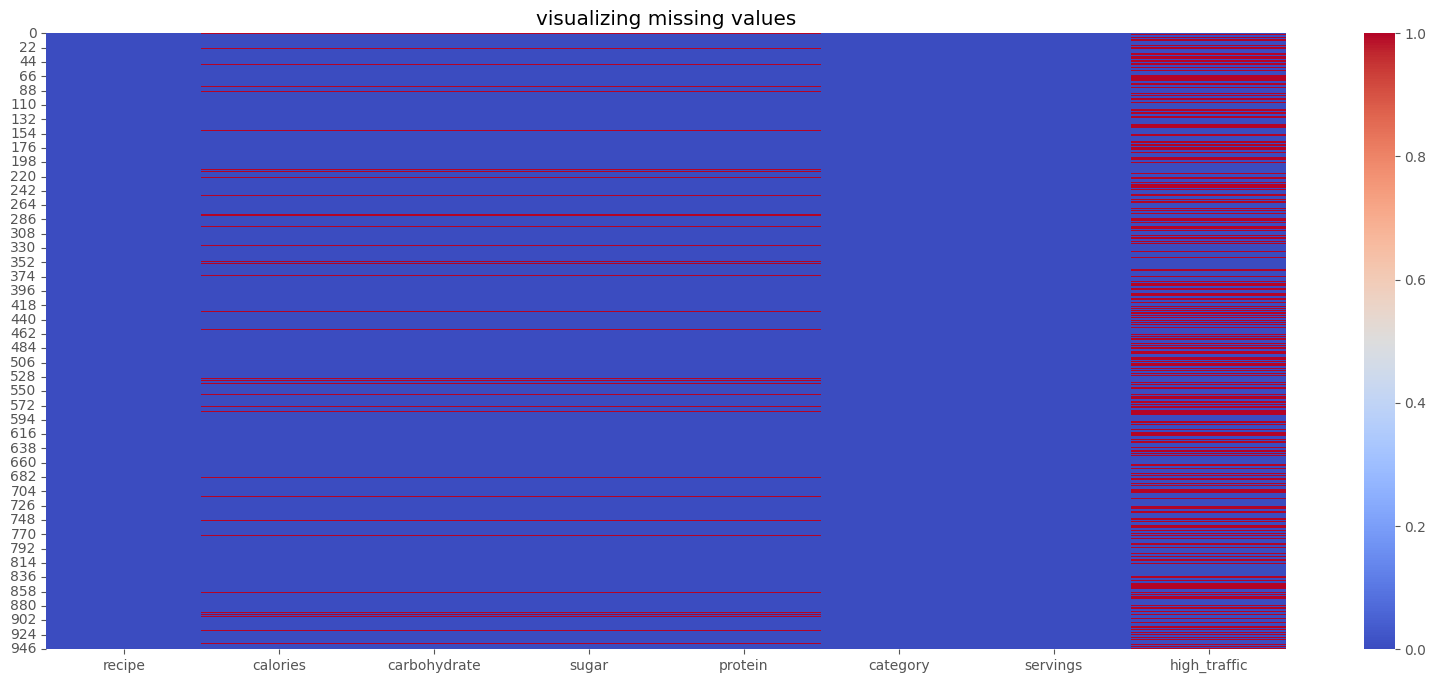

In [88]:
# visualize the missing values
plt.figure(figsize = (20, 8))
plt.title('visualizing missing values')
sns.heatmap(df.isnull(), cbar = True, cmap = 'coolwarm')
plt.show()

In [89]:
# summary statistics of the data
df.describe().astype('int')

,recipe,calories,carbohydrate,sugar,protein
count,947,895,895,895,895
mean,474,435,35,9,24
std,273,453,43,14,36
min,1,0,0,0,0
25%,237,110,8,1,3
50%,474,288,21,4,10
75%,710,597,44,9,30
max,947,3633,530,148,363


The average number of calories per recipe was 474, with a standard deviation of 273. This means that most recipes fell within a range of approximately 201 to 747 calories.

On average, each recipe contained 435 grams of carbohydrates, with a standard deviation of 453 grams. The range of carbohydrate content varied widely, from 0 grams to a maximum of 3633 grams.

When it came to sugar, the average recipe contained 35 grams, with a standard deviation of 43 grams. The minimum amount of sugar in a recipe was 0 grams, while the maximum reached 530 grams.

Protein content in the recipes averaged at 24 grams, with a standard deviation of 36 grams. The lowest protein content observed was 0 grams, whereas the highest recorded value was 363 grams.

# Data Validation

In [90]:
# extract the numerical columns from the dataset
num_vars = df.select_dtypes(include=['int64', 'float64'])

# confirm if there are negative for each columns
num_vars_negative = (num_vars < 0).sum()

print(num_vars_negative)

recipe          0
calories        0
carbohydrate    0
sugar           0
protein         0
dtype: int64


In [91]:
# select the numerical columns
num_vars = df.select_dtypes(include = ['int64', 'float64']).columns.tolist()
print(num_vars)

['recipe', 'calories', 'carbohydrate', 'sugar', 'protein']


In [92]:
# loop through all the numerical column
for column in num_vars:
    print(df[column].value_counts())

recipe
1      1
637    1
625    1
626    1
627    1
      ..
320    1
321    1
322    1
323    1
947    1
Name: count, Length: 947, dtype: int64
calories
47.89     2
34.97     2
529.26    2
128.30    2
35.48     1
         ..
92.21     1
472.91    1
409.03    1
31.75     1
184.56    1
Name: count, Length: 891, dtype: int64
carbohydrate
3.46     3
6.40     3
9.58     3
5.14     3
7.73     3
        ..
96.03    1
0.86     1
11.83    1
39.55    1
45.21    1
Name: count, Length: 835, dtype: int64
sugar
1.62    5
1.51    5
2.97    4
1.27    4
0.77    4
       ..
5.44    1
1.80    1
2.00    1
9.00    1
6.20    1
Name: count, Length: 666, dtype: int64
protein
0.36      6
0.93      4
0.02      4
0.04      4
0.38      4
         ..
22.89     1
169.78    1
14.14     1
15.08     1
8.07      1
Name: count, Length: 772, dtype: int64


In [93]:
# select the categorical columns
cat_vars = df.select_dtypes(include = ['category', 'object']).columns.tolist()
print(cat_vars)

['category', 'servings', 'high_traffic']


In [94]:
# loop through all the categorical column
for column in cat_vars:
    print(df[column].value_counts())

category
Breakfast         106
Chicken Breast     98
Beverages          92
Lunch/Snacks       89
Potato             88
Pork               84
Vegetable          83
Dessert            83
Meat               79
Chicken            74
One Dish Meal      71
Name: count, dtype: int64
servings
4               389
6               197
2               183
1               175
4 as a snack      2
6 as a snack      1
Name: count, dtype: int64
high_traffic
High    574
Name: count, dtype: int64


In [95]:
# replace the extra categories with '4' and '6' respectively, and covert to integer
df['servings'] = df['servings'].str.replace('4 as a snack', '4')
df['servings'] = df['servings'].str.replace('6 as a snack', '6')
df['servings'] = pd.to_numeric(df['servings'], errors='coerce')

# replace the extra category with 'Chicken'
df['category'] = df['category'].str.replace('Chicken Breast', 'Chicken')

In [96]:
# unique counts of serving
df['servings'].value_counts()

servings
4    391
6    198
2    183
1    175
Name: count, dtype: int64

In [97]:
# unique counts of category
df['category'].value_counts()

category
Chicken          172
Breakfast        106
Beverages         92
Lunch/Snacks      89
Potato            88
Pork              84
Vegetable         83
Dessert           83
Meat              79
One Dish Meal     71
Name: count, dtype: int64

In [98]:
# the number of distinct category
df['category'].nunique()

10

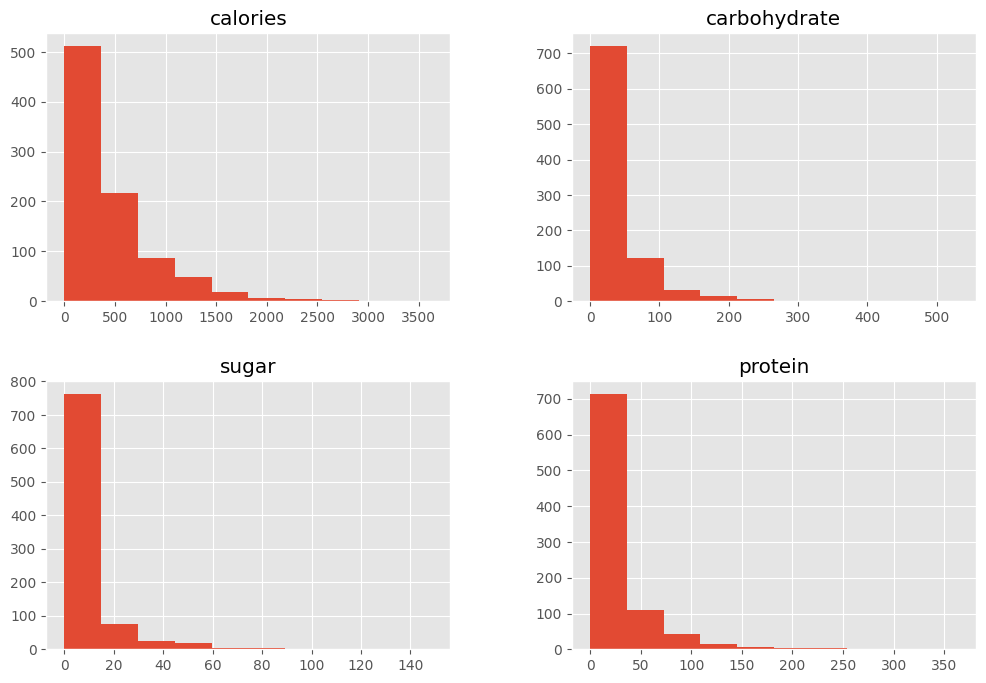

In [99]:
# Plotting the distribution of these columns to understand its skewness
columns = ['calories', 'carbohydrate', 'sugar', 'protein']
ax = df[columns].hist(figsize=(12,8))
plt.show()

In [100]:
# fill the missing values in columns with their mean
df[columns] = df[columns].fillna(df[columns].mean())

# fill the missing values in high_traffice with 'Low'
df['high_traffic'] = df['high_traffic'].fillna('Low')

In [101]:
# check the unique values in 'high_traffic'
df['high_traffic'].value_counts()

high_traffic
High    574
Low     373
Name: count, dtype: int64

In [102]:
# check if there are still missing values in the columns
df[columns].isnull().sum()

calories        0
carbohydrate    0
sugar           0
protein         0
dtype: int64

In [103]:
# recheck the first 10 rows of the DataFrame
df.head(10)

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,435.939196,35.069676,9.046547,24.149296,Pork,6,High
1,2,35.480000,38.560000,0.660000,0.920000,Potato,4,High
2,3,914.280000,42.680000,3.090000,2.880000,Breakfast,1,Low
3,4,97.030000,30.560000,38.630000,0.020000,Beverages,4,High
4,5,27.050000,1.850000,0.800000,0.530000,Beverages,4,Low
5,6,691.150000,3.460000,1.650000,53.930000,One Dish Meal,2,High
6,7,183.940000,47.950000,9.750000,46.710000,Chicken,4,Low
7,8,299.140000,3.170000,0.400000,32.400000,Lunch/Snacks,4,Low
8,9,538.520000,3.780000,3.370000,3.790000,Pork,6,High
9,10,248.280000,48.540000,3.990000,113.850000,Chicken,2,Low


In [104]:
# shape of the data
df.shape

(947, 8)

In [105]:
# info of data to confirm data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      947 non-null    float64
 2   carbohydrate  947 non-null    float64
 3   sugar         947 non-null    float64
 4   protein       947 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    int64  
 7   high_traffic  947 non-null    object 
dtypes: float64(4), int64(2), object(2)
memory usage: 59.3+ KB


In [106]:
df.describe().astype('int')

,recipe,calories,carbohydrate,sugar,protein,servings
count,947,947,947,947,947,947
mean,474,435,35,9,24,3
std,273,440,42,14,35,1
min,1,0,0,0,0,1
25%,237,114,9,1,3,2
50%,474,313,23,5,12,4
75%,710,576,42,9,28,4
max,947,3633,530,148,363,6


# Data Validation Answer
This data set has 947 rows, 8 columns. I have validated all variables and I have made several changes after validation: replace rows with null values in calories, carbohydrate, sugar, protein with their respective mean, and replace null values in high_traffic with "Low".

recipe: 947 unique identifiers without missing values, same as description. No cleaning is needed.

calories: 895 non-null values with 52 missing values. I replaced the missing values with the mean of the column.

carbohydrate: 895 non-null values with 52 missing values. I replaced the missing values with the mean of the column.

sugar: 895 non-null values with 52 missing values. I replaced the missing values with the mean of the column.

protein: 895 non-null values with 52 missing values. I replaced the missing values with the mean of the column.

category: 11 categories without missing values, whereas there were 10 values in the description. I replace the extra value which is 'Chicken Breast' with the 'Chicken' value.

servings: 6 categories without missing values. By description, it should be numeric variable, but now it's character. It has two extra values: '4 as a snack' and '6 as a snack'. I replaced and united them with '4' and '6' and changed the column's type to integer.

high_traffic: 574 non-null values with only 1 category ("High"). I replaced the null values with "Low".

# Exploratory Data Analysis And Visualization

### Univariate Analysis

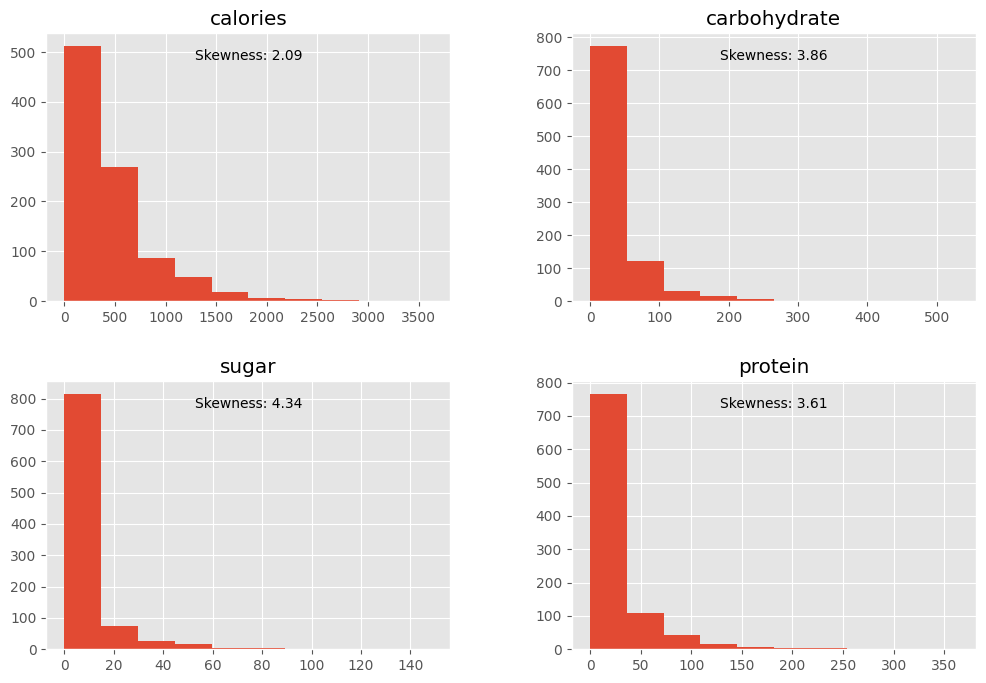

In [107]:
# Distribution of the numerical variables apart from 'recipe' because it is a unique identifier
ax = df[['calories', 'carbohydrate', 'sugar', 'protein']].hist(figsize=(12,8))

# Calculate skewness for each variable
skewness = df[['calories', 'carbohydrate', 'sugar', 'protein']].skew()

# Add skewness value to the plot
for i, col in enumerate(['calories', 'carbohydrate', 'sugar', 'protein']):
    ax[i // 2, i % 2].text(0.5, 0.9, f"Skewness: {skewness[col]:.2f}", transform=ax[i // 2, i % 2].transAxes, ha='center')

plt.show()

The distribution of the variables calories, carbohydrate, sugar, and protein is skewed to the right. This indicates that the majority of people have higher values for these variables. Specifically, the skewness values are 2.09 for calories, 3.86 for carbohydrate, 4.34 for sugar, and 3.61 for protein.

Based on these skewness values, it can be inferred that most individuals consume calories above 435, carbohydrate above 35 grams, sugar above 9 grams, and protein above 24 grams in their diet.

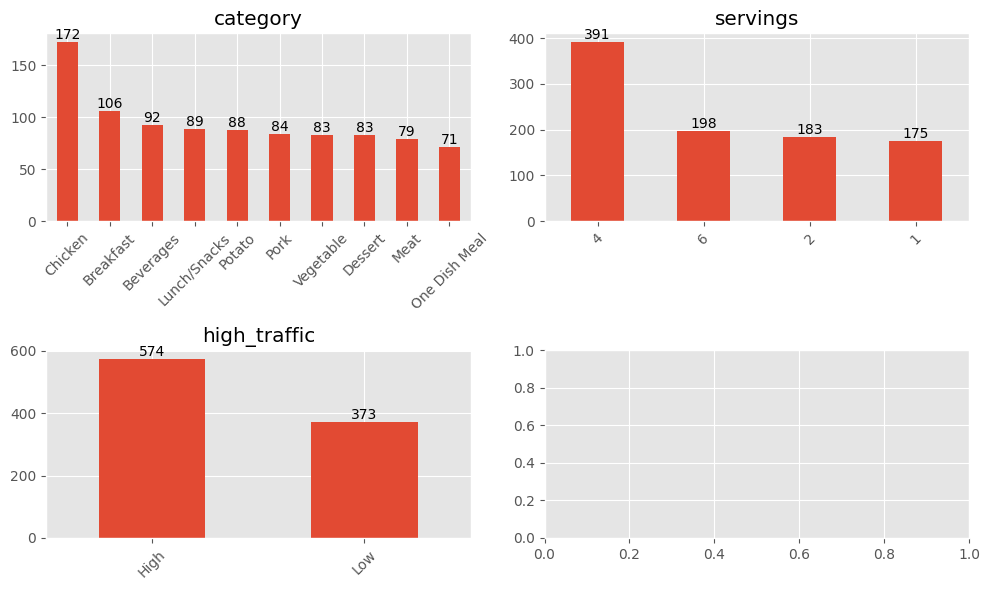

In [108]:
# Distribution of Categorical variables
# Create a figure and subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

# Iterate through the columns and plot the charts
for i, col in enumerate(['category', 'servings', 'high_traffic']):
    row = i // 2  # Determine the row index
    col_index = i % 2   # Determine the column index using a different variable name

    # Plot a bar chart for categorical columns
    counts = df[col].value_counts()
    counts.plot(kind='bar', ax=axes[row, col_index])
    axes[row, col_index].set_title(col)
    axes[row, col_index].set_xlabel('')
    
    # Add data labels
    for index, value in enumerate(counts):
        axes[row, col_index].text(index, value, str(value), ha='center', va='bottom')

    # Rotate x-axis labels
    axes[row, col_index].tick_params(axis='x', rotation=45)

# Adjust the layout and spacing
plt.tight_layout()

# Show the plot
plt.show()

The data shows that chicken recipes are the most popular, with a total count of 172, followed by breakfast recipes with a total count of 106. One Dish Meal recipes are the least popular, with a total count of 71. 

Regarding serving sizes, it appears that 4 servings are the most preferred, with a total count of 391, followed by 6 servings with a total count of 198. The least preferred serving size is 1 serving, with a total count of 175.

In terms of website traffic, there were 574 high traffic and 373 low traffic views when the recipe was shown.

### Bivariate Analysis

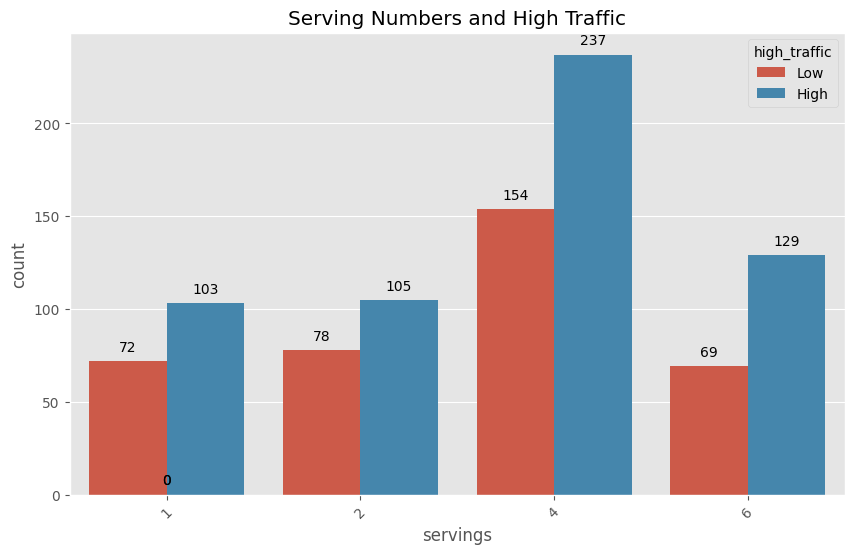

In [109]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the countplot
ax = sns.countplot(df, x="servings", hue="high_traffic")

# Add data labels
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Add title 
plt.title('Serving Numbers and High Traffic')

# Display the plot
plt.show()


*For each serving, the amount of recipes with high traffic are more than the amount of recipes with low traffic, so this feature doesn't have a big influence on target variable.*

In [110]:
df.columns

Index(['recipe', 'calories', 'carbohydrate', 'sugar', 'protein', 'category',
       'servings', 'high_traffic'],
      dtype='object')

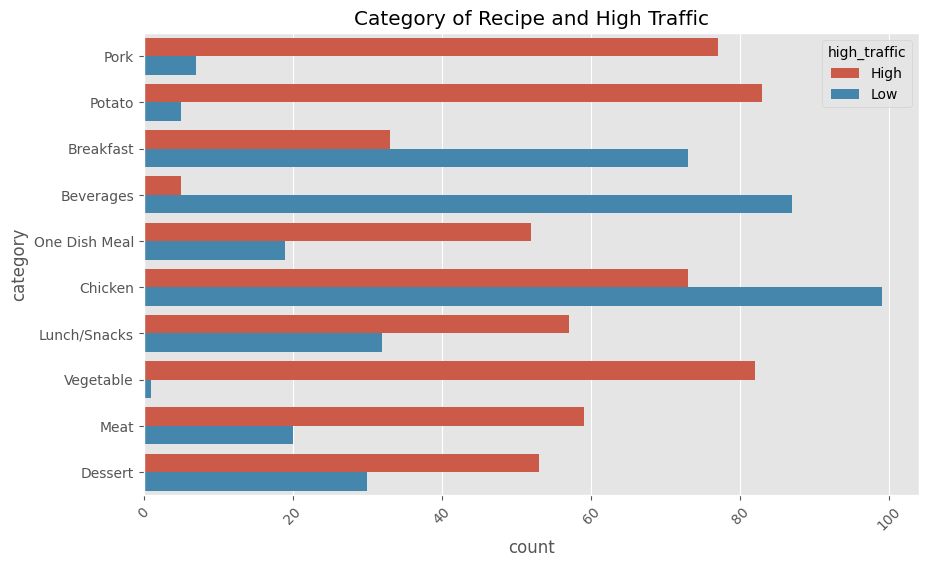

In [111]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the countplot
ax = sns.countplot(data=df, y="category", hue="high_traffic")

# Rotate y-axis labels
plt.xticks(rotation=45)

# Add title 
plt.title('Category of Recipe and High Traffic')

# Display the plot
plt.show()


Potato, Pork and Vegetable categories have a higher number of recipes with high traffic than with low traffic.

One Dish Meal, Lunch/Snacks, Meat, Dessert categories have just more recipes with high traffic than with low traffic.

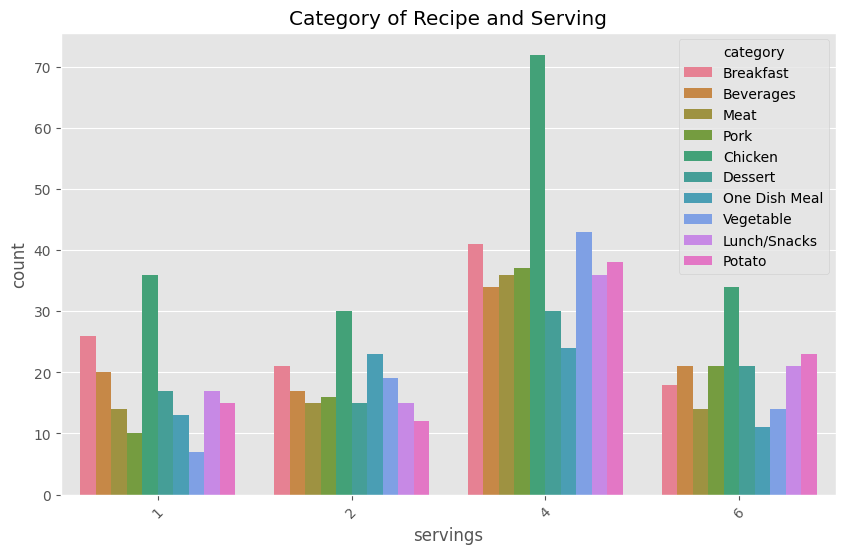

In [112]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the countplot
ax = sns.countplot(data=df, x="servings", hue="category")

# Rotate y-axis labels
plt.xticks(rotation=45)

# Add title 
plt.title('Category of Recipe and Serving')

# Display the plot
plt.show()

Chicken recipe category has the highest count across all the number of servings requested by the customer who visited the website, followed by Breakfast recipe category.

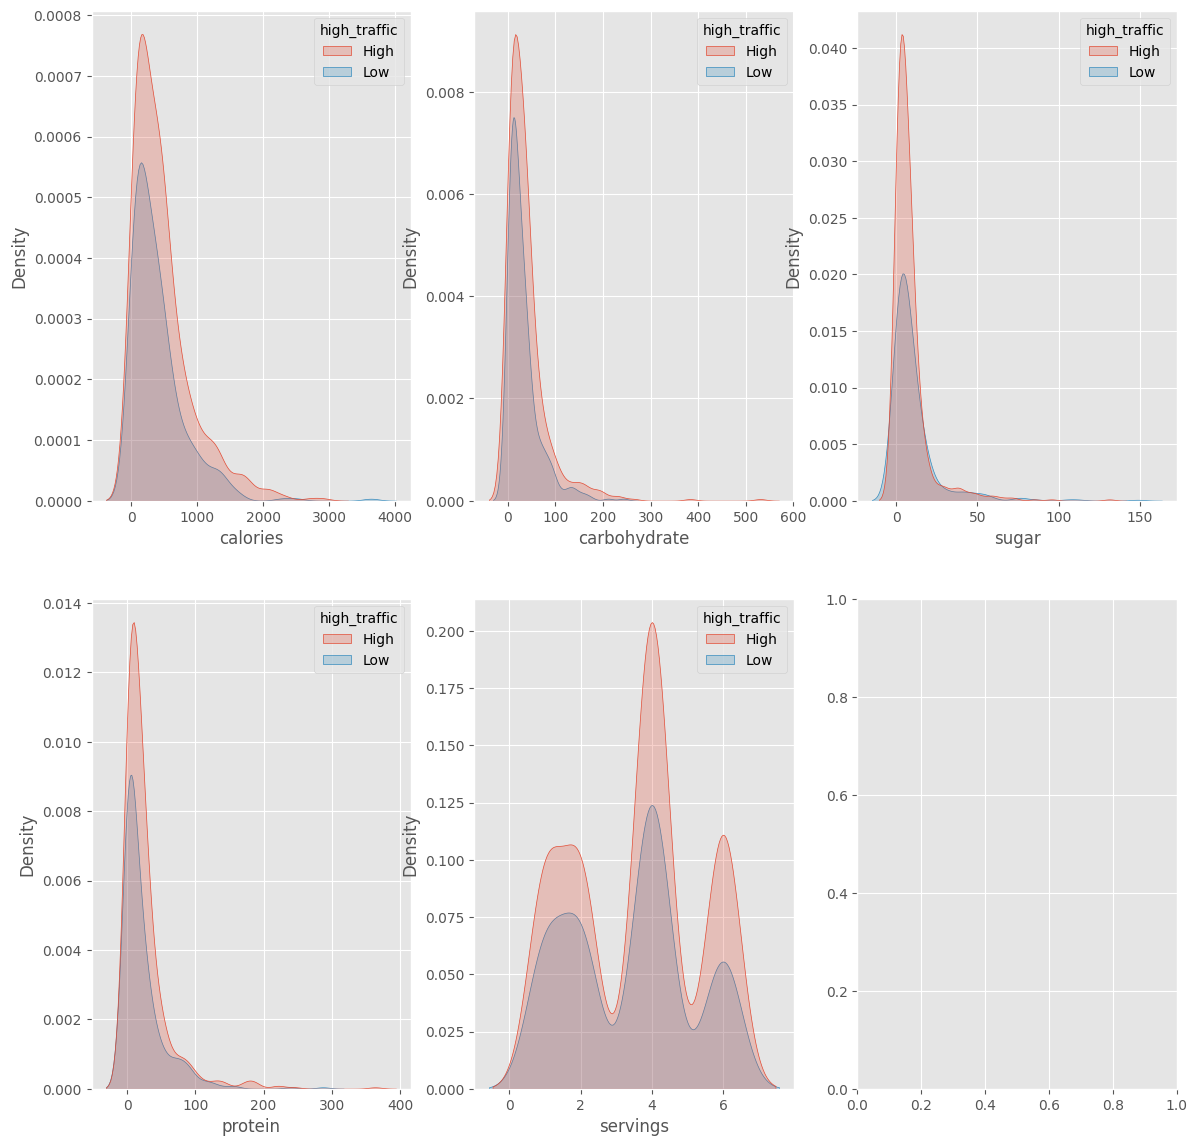

In [113]:
columns = ['calories', 'carbohydrate', 'sugar', 'protein', 'servings']
fig, ax = plt.subplots(2, 3, figsize=(14,14))
for name, ax in zip(columns, ax.ravel()):
    sns.kdeplot(data=df, hue='high_traffic', x=name, shade=True, ax=ax)
plt.show()

Protein, sugar, and 4 number of servings are the major contributor to the high traffic of recipes as seen on the website.

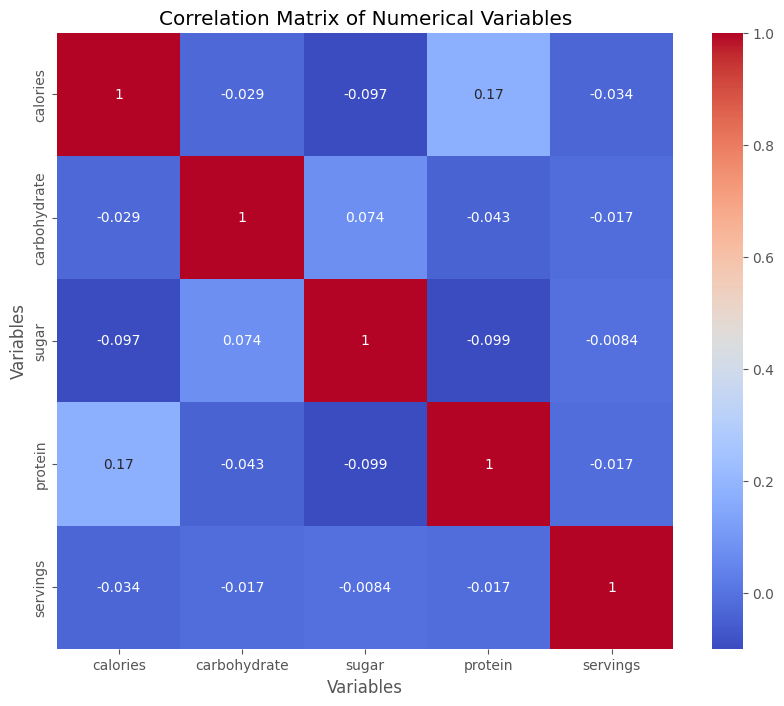

In [114]:
# Select numerical columns for correlation matrix
numerical_columns = ['calories', 'carbohydrate', 'sugar', 'protein', 'servings']

# Compute the correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)

# Set title and axis labels
plt.title('Correlation Matrix of Numerical Variables')
plt.xlabel('Variables')
plt.ylabel('Variables')

# Display the plot
plt.show()


There is a very slight positive correlation between sugar and carbohydrate with a coefficient of 0.074 while protein and calories shows a slight correlation with a coefficient of 0.17. 

<Figure size 2000x800 with 0 Axes>

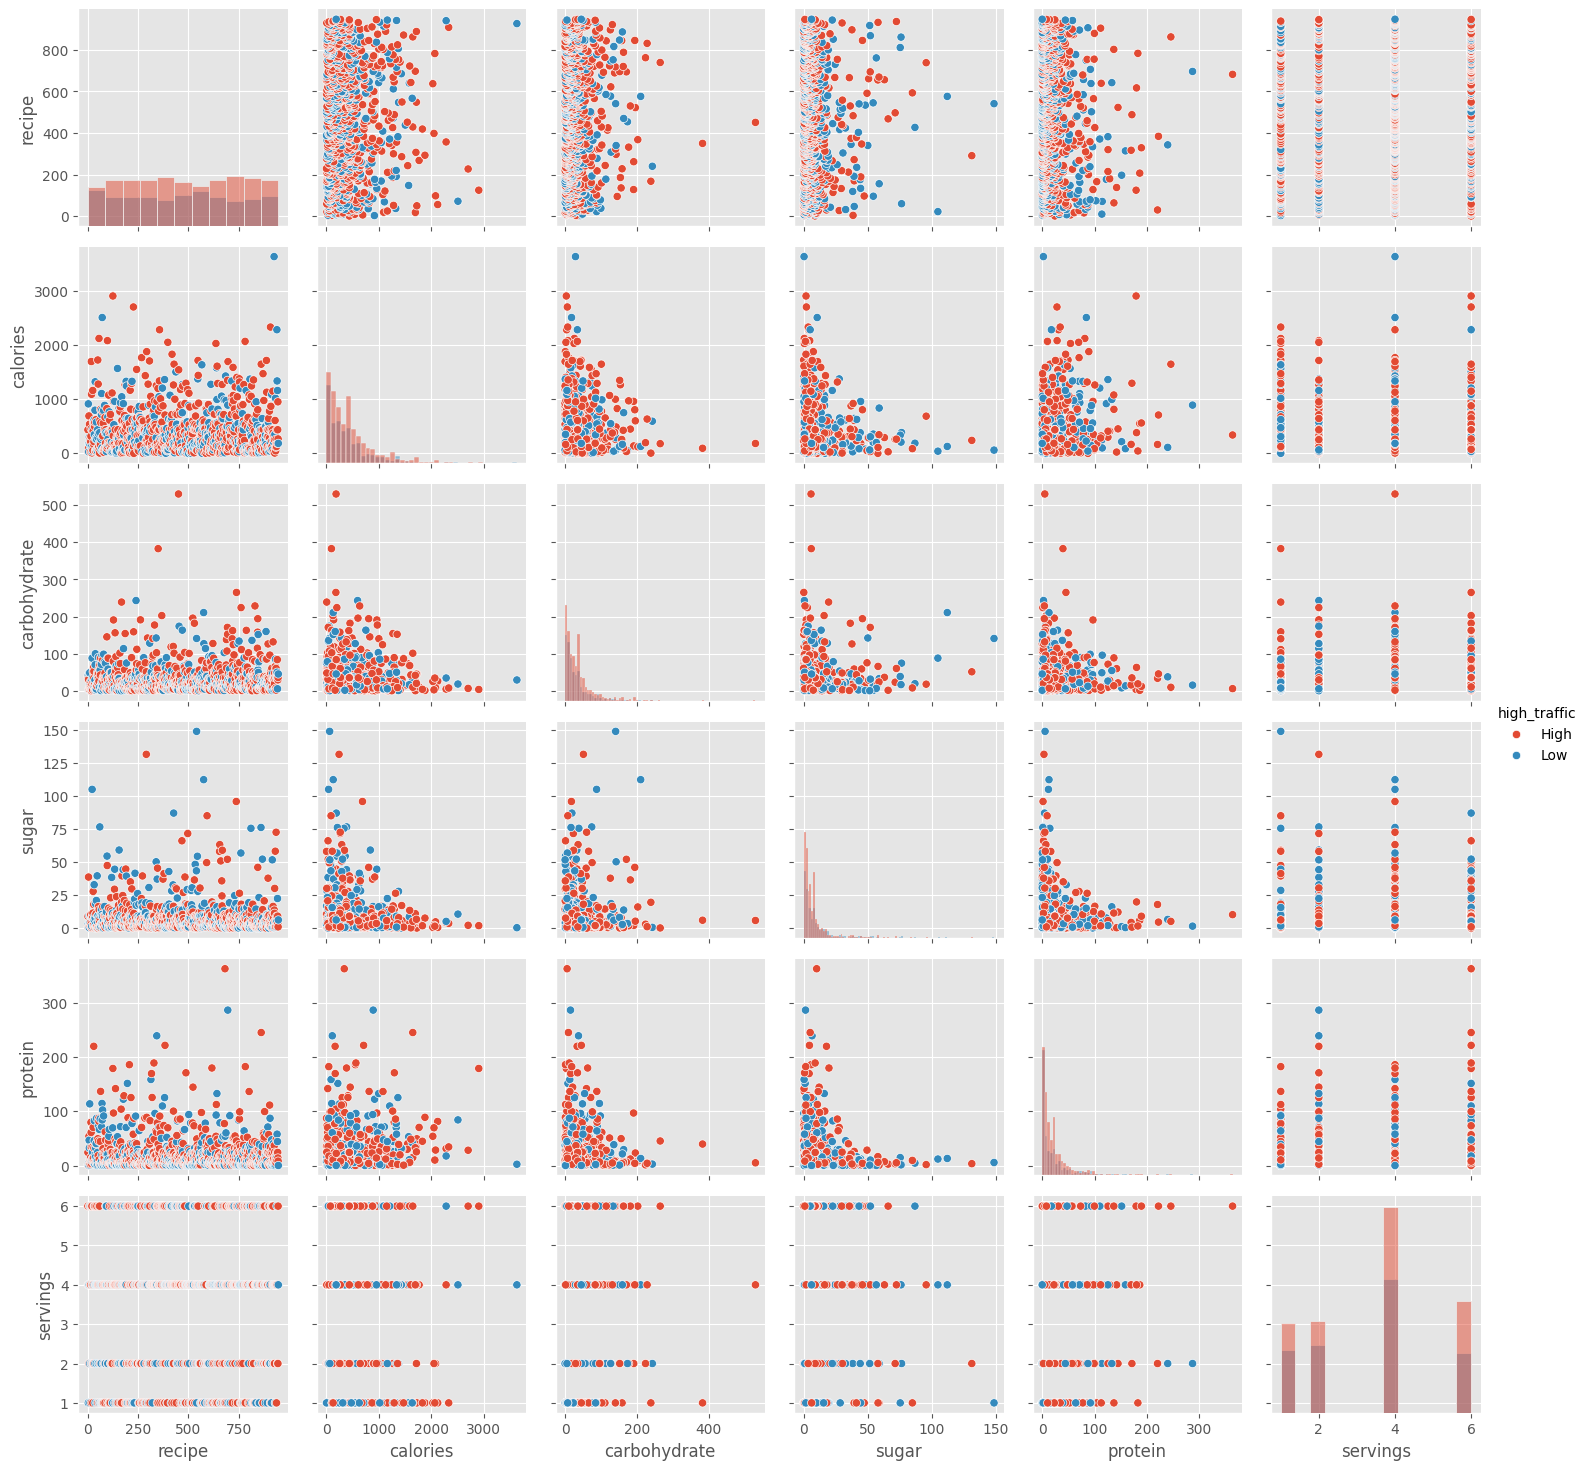

In [115]:
# Pairplots showing the relationship between numerical variables with respect to attended
plt.figure(figsize=(20,8))
p = sns.PairGrid(data=df, hue='high_traffic')
p.map_offdiag(sns.scatterplot)
p.map_diag(sns.histplot)
p.add_legend()   # Add a legend to the chart
plt.show()

The protein and calories shows a slight positive correlation to drive the high traffic of recipes as compared to others.

# COnvert Categorical Features to Numerical
- Using Label Encoding

In [116]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'df' is your DataFrame
columns_to_encode = ['category', 'high_traffic']

# Create a label encoder instance
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

# Display the updated DataFrame
print(df.head())


   recipe    calories  carbohydrate      sugar    protein  category  servings  \
0       1  435.939196     35.069676   9.046547  24.149296         7         6   
1       2   35.480000     38.560000   0.660000   0.920000         8         4   
2       3  914.280000     42.680000   3.090000   2.880000         1         1   
3       4   97.030000     30.560000  38.630000   0.020000         0         4   
4       5   27.050000      1.850000   0.800000   0.530000         0         4   

   high_traffic  
0             0  
1             0  
2             1  
3             0  
4             1  


# Feature Selection


In [117]:
# drop the recipe as it is just a unique identifier
df.drop('recipe', axis=1, inplace=True)

In [118]:
# Select the target variable y
y = df['high_traffic']

# Drop the target variable and create the independent variables
X = df.drop('high_traffic', axis=1)

In [119]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: high_traffic, dtype: int32

In [120]:
X.head()

,calories,carbohydrate,sugar,protein,category,servings
0,435.939196,35.069676,9.046547,24.149296,7,6
1,35.480000,38.560000,0.660000,0.920000,8,4
2,914.280000,42.680000,3.090000,2.880000,1,1
3,97.030000,30.560000,38.630000,0.020000,0,4
4,27.050000,1.850000,0.800000,0.530000,0,4


In [121]:
# value count of the target y
y.value_counts()

high_traffic
0    574
1    373
Name: count, dtype: int64

# Oversampling using SMOTE (Synthetic Minority Over-sampling Technique)
SMOTE is a technique used to balance imbalanced datasets(target), where one class is significantly smaller than the other. It creates synthetic samples by creating new instances that are similar to the minority class. This helps prevent overfitting, which is a problem that can occur when using other techniques like ROS(Random Over Sampling).


In [122]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Instantiate SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Resampled the data
X_resampled, y_resampled = smote.fit_resample(X, y)

# Print the class distribution before and after resampling
print('Class distribution before resampling: {}'.format(Counter(y)))
print('Class distribution after resampling: {}'.format(Counter(y_resampled)))

Class distribution before resampling: Counter({0: 574, 1: 373})
Class distribution after resampling: Counter({0: 574, 1: 574})


# Train-Test-Split
Split the dataset into training and testing sets. We will allocate a certain percentage of 80-20 for training and testing, respectively. This will be done using the train_test_split function from scikit-learn.


In [123]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

print('\n', X_train.head(2))
print('\n', X_test.head(2))
print('\n', y_train.head(2))
print('\n', y_test.head(2))


      calories  carbohydrate  sugar  protein  category  servings
694   1348.40        152.24   0.15     2.56         6         2
833     86.02         31.49   1.27     6.72         4         6

      calories  carbohydrate  sugar  protein  category  servings
170    431.28         14.69   4.17    32.79         6         2
535    689.29          5.14   1.13    12.72         9         4

 694    0
833    0
Name: high_traffic, dtype: int32

 170    0
535    0
Name: high_traffic, dtype: int32


In [124]:
print(f'The X_train shape: {X_train.shape}')
print(f'The X_test shape: {X_test.shape}')
print(f'The y_train shape: {y_train.shape}')
print(f'The y_test shape: {y_test.shape}')

The X_train shape: (918, 6)
The X_test shape: (230, 6)
The y_train shape: (918,)
The y_test shape: (230,)


# Scaling of Data
- Using the MinMax Scaler 

In [125]:
from sklearn.preprocessing import MinMaxScaler
# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training features
scaler.fit(X_train)

# Transform the training and test features
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Selection
The following algortihms for the model selection include:
- Logistic Regression
- Linear Support Vector Machine

In [126]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn import metrics

# for hyperparameter tuning using k-fold cross validation
from sklearn.model_selection import cross_val_score, cross_val_predict

# Model Training
- Import the necessary libraries for each algorithms
- create an instance of each model
- fit the models to the training data using the fit method

### Logistic Regression

In [127]:
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)
lr_probs = lr_model.predict_proba(X_test_scaled)[:, 1]

In [128]:
from sklearn.metrics import accuracy_score
# create predictions
y_pred = lr_model.predict(X_test_scaled)

# print accuracy score for Logistic Regression
accuracy = accuracy_score(y_pred, y_test)
rounded_accuracy = round(accuracy, 2)
print(f'The accuracy of the logistic regression is {rounded_accuracy:.2f}')

The accuracy of the logistic regression is 0.74


In [129]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def metrics_calculator(y_true, y_pred, model_name):
    '''
    Calculates and return a dictionary of performance metrics for a binary classification model
    '''
    # Calculate performance metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    # Create a dictionary of results
    results = {'Model': model_name, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-Score': f1}
    return results

lr_result = metrics_calculator(y_test, y_pred, 'lr_model')
lr_result

{'Model': 'lr_model',
 'Accuracy': 0.7434782608695653,
 'Precision': 0.6837606837606838,
 'Recall': 0.7843137254901961,
 'F1-Score': 0.730593607305936}

### Linear Support Vector Machine

In [130]:
# Create an instance of Support Vector Machine with linear kernel
svm_model = SVC(kernel='linear', probability=True)

# Fit the model on the scaled training data
svm_model.fit(X_train_scaled, y_train)

# Predict probabilities for the scaled test data
svm_probs = svm_model.predict_proba(X_test_scaled)[:, 1]

In [131]:
# Predict the classes of the testing data
y_pred = svm_model.predict(X_test_scaled)

# print accuracy score for SVM
accuracy = accuracy_score(y_pred, y_test)
rounded_accuracy = round(accuracy, 2)
print(f'The accuracy of the SVM is {rounded_accuracy:.2f}')

The accuracy of the SVM is 0.72


In [132]:
svm_result = metrics_calculator(y_test, y_pred, 'svm_model')
svm_result

{'Model': 'svm_model',
 'Accuracy': 0.717391304347826,
 'Precision': 0.6390977443609023,
 'Recall': 0.8333333333333334,
 'F1-Score': 0.723404255319149}

## Model Evaluation
Further evaluate the models using classification reports and confusion matrices.

Logistic Regression Classification Report:
              precision    recall  f1-score   support

         Low      0.805     0.711     0.755       128
        High      0.684     0.784     0.731       102

    accuracy                          0.743       230
   macro avg      0.745     0.748     0.743       230
weighted avg      0.751     0.743     0.744       230



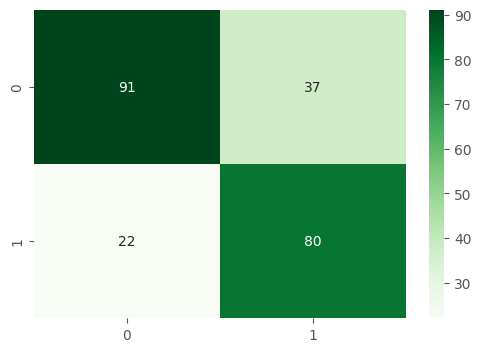

Linear SVM Classification Report:
              precision    recall  f1-score   support

         Low      0.825     0.625     0.711       128
        High      0.639     0.833     0.723       102

    accuracy                          0.717       230
   macro avg      0.732     0.729     0.717       230
weighted avg      0.742     0.717     0.717       230



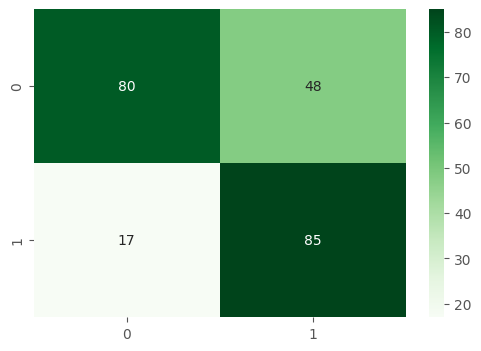

In [133]:
from sklearn.metrics import classification_report

# Create a list of model names
model_names = ['Logistic Regression', 'Linear SVM']
models = [lr_model, svm_model]

# Set the labels
labels = ['Low', 'High']

# Set the desired number of decimal places
decimal_places = 3

# Loop through each model and generate a classification report and confusion matrix
for i, model in enumerate(models):
    # Predict the classes of the testing data
    y_pred = model.predict(X_test_scaled)
    
    # Generate the classification report with 3 decimal places
    report = classification_report(y_test, y_pred, target_names=labels, digits=decimal_places)
    print(f'{model_names[i]} Classification Report:\n{report}')
    
    # Get the current axis and set the figure size
    ax = plt.gca()
    ax.figure.set_size_inches(6, 4)
    
    # Add a heatmap style to the confusion matrix plot
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens', ax=ax)
    
    plt.show()

The Logistic Regression model demonstrates higher performance in terms of Precision, Recall, and F1 Score for high traffic, with values of 0.684, 0.784, and 0.731, respectively. On the other hand, the Linear Support Vector Classification model achieves slightly lower scores of 0.639, 0.833, and 0.723, respectively. These results indicate that the Logistic Regression model is more effective in capturing the underlying patterns in the features and exhibits a lower level of error when predicting values.

In [134]:
# Concatenate results into a single dataframe all the model metric calculator results
results_df = pd.DataFrame([lr_result, svm_result])
results_df

,Model,Accuracy,Precision,Recall,F1-Score
0,lr_model,0.743478,0.683761,0.784314,0.730594
1,svm_model,0.717391,0.639098,0.833333,0.723404


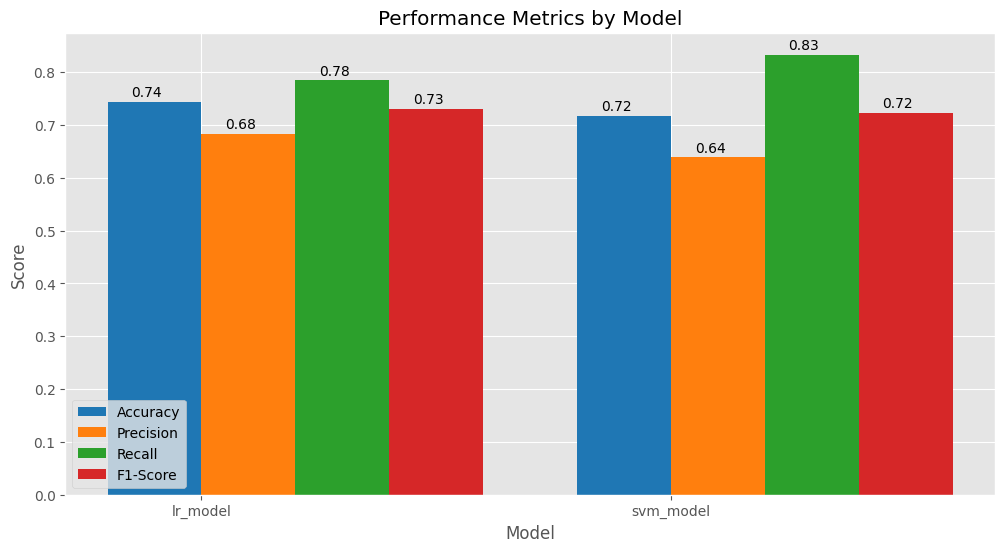

In [135]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Set the width of the bars
bar_width = 0.2

# Create a bar chart of the metrics for each model
models = results_df['Model']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

for i, metric in enumerate(metrics):
    plt.bar(np.arange(len(models)) + i * bar_width, results_df[metric], width=bar_width, color=colors[i], label=metric)
    for j, value in enumerate(results_df[metric]):
        plt.text(j + i * bar_width - 0.05, value + 0.01, '{:.2f}'.format(value))

# Add labels and legend
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Performance Metrics by Model')
plt.xticks(np.arange(len(models)) + bar_width / 2, models)
plt.legend()

# Show the chart
plt.show()


*It is seen that Logistic Regression provides the balance measure between correctly identifying High traffic case(recall) with a percentage of 78% and minimizing false positive(precision) with a percentage of 68%. It has a higher accuracy of 74% for predicting the high traffic rate.*

## AUC-ROC
The AUC-ROC scores of the models to their accuracy score and confusion matrices can be used to get a complete picture of each model's performance. The AUC-ROC score measures the overall performance of a binary classifier, taking into account bith true positive rate and false positive rate. The higher the AUC-ROC score, the better the model's ability to distinguish between positive and negative classes. Therefore, a model with a higher AUC-ROC score is generally considered to be better than a model with a lower score.

In [136]:
# Calculate the AUC-ROC for logistic regression
lr_auc = roc_auc_score(y_test, lr_probs)

# Calculate the AUC-ROC for svc
svm_auc = roc_auc_score(y_test, svm_probs)

# Print the AUC-ROC scores
print(f'Logistic Regression AUC-ROC: {lr_auc:.3f}')
print(f'Support Vector Machine AUC-ROC: {svm_auc:.3f}')

Logistic Regression AUC-ROC: 0.837
Support Vector Machine AUC-ROC: 0.836


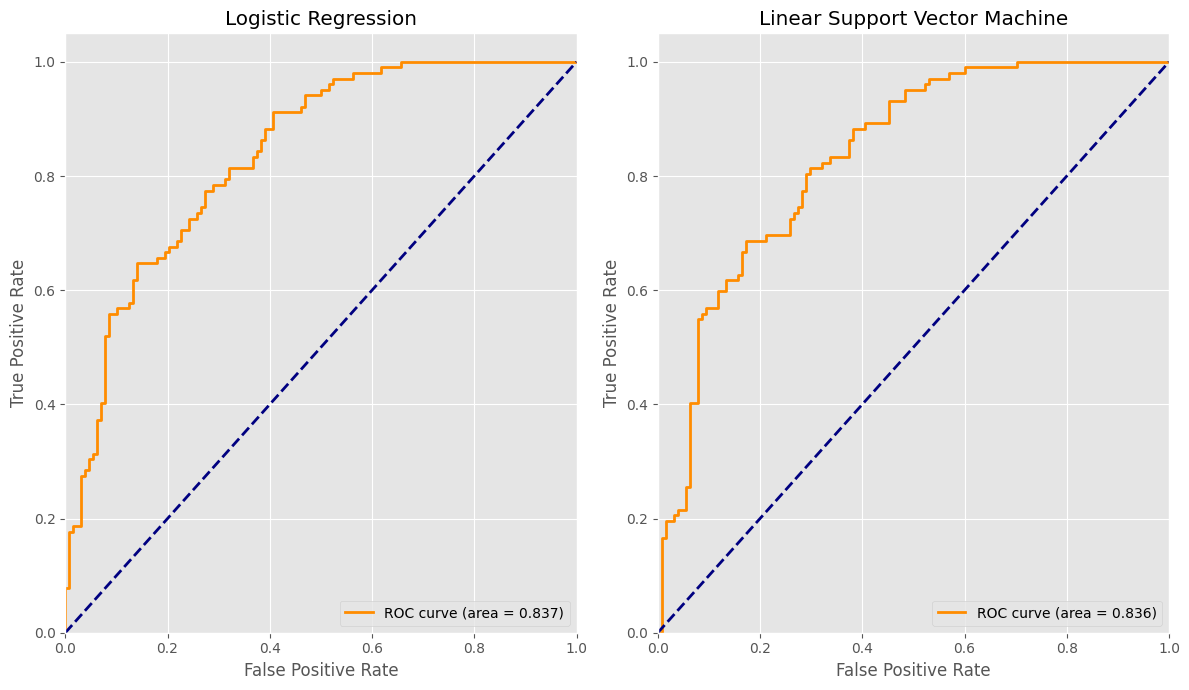

In [137]:
from sklearn.metrics import roc_curve, auc

# Define the models and their names
models = [lr_model, svm_model]
model_names = ['Logistic Regression', 'Linear Support Vector Machine']

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 7))
axes = axes.flatten()

# Plot ROC curve and score for each model
for i, (model, name) in enumerate(zip(models, model_names)):
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test_scaled)[:, 1])
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    axes[i].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.3f})'.format(roc_auc))
    axes[i].plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
    axes[i].set_xlim([0, 1])
    axes[i].set_ylim([0, 1.05])
    axes[i].set_xlabel('False Positive Rate')
    axes[i].set_ylabel('True Positive Rate')
    axes[i].set_title(name)
    axes[i].legend(loc='lower right')

# Adjust spacing between subplots
plt.tight_layout()

# Show the chart
plt.show()

Based on the observed AUC-ROC scores, it is evident that Logistic Regression outperforms Support Vector Machine. The Logistic Regression model achieves an AUC-ROC score of 0.837, slightly higher than the AUC-ROC score of 0.836 obtained by the Support Vector Machine model. This reinforces the notion that Logistic Regression delivers superior performance and serves as a reliable baseline model for the task at hand.

## Feature Engineering 
After training the best performing model which is Decision Tree model, We will analyze feature importance.  For example, we will use Random Forest Classifier model to check feature importances as follows:

In [138]:
# Feature importances using Random Forest
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier object
rf_classifier = RandomForestClassifier()

# Fit the classifier to your training data
rf_classifier.fit(X_train_scaled, y_train)

# Get feature importances from the trained classifier
feature_importances = rf_classifier.feature_importances_

# Display feature importances alongside feature names
feature_names = X.columns
feature_importances_dict = dict(zip(feature_names, feature_importances))
sorted_feature_importance = sorted(feature_importances_dict.items(), key=lambda x: x[1], reverse=True)


for feature, importance in sorted_feature_importance:
    print(f'{feature}: {importance:.3f}')

category: 0.350
protein: 0.157
calories: 0.151
carbohydrate: 0.149
sugar: 0.131
servings: 0.061


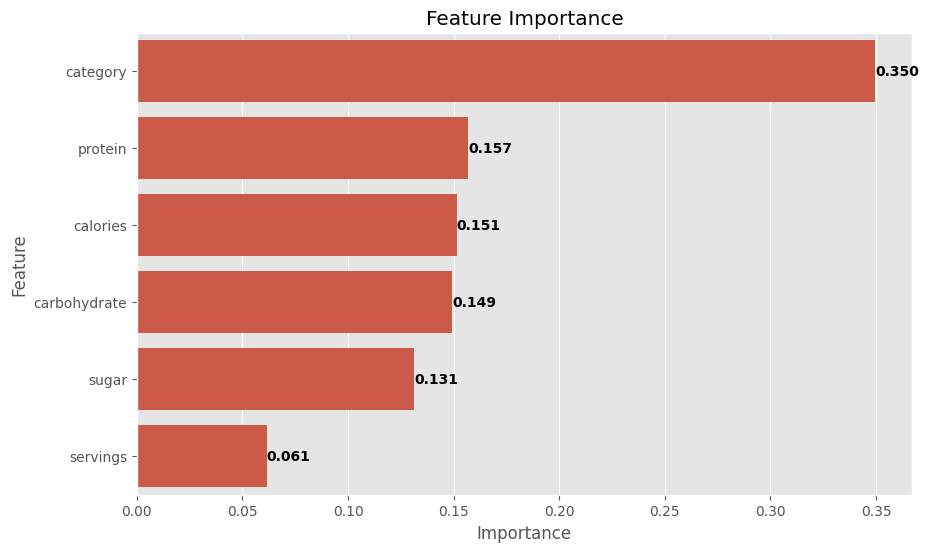

In [139]:
# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances as a bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')

# Annotate the bars with the importance values
for i, v in enumerate(feature_importance_df['Importance']):
    ax.text(v, i, f'{v:.3f}', color='black', va='center', fontsize=10, fontweight='bold')

plt.show()

*The feature importances of recipes high traffic prediction using random forest, based on their importance scores from the chart. It shows that category, followed by protein, and calories are the major predictors. Carbohydrate, sugar, and servings were also important but to a lesser extent.*

## A Bit of Features Selection
We will use the following features; category, followed by protein, and calories to retrain the Logistic Regression model.

In [140]:
# split into training and validation set using 30-70 split ratio
X_train, X_valid, y_train, y_valid = train_test_split(X_resampled, y_resampled, test_size=0.3)

X_train2 = X_train[['category', 'calories', 'protein']]
X_valid2 = X_valid[['category', 'calories', 'protein']]

In [141]:
# fit the model on the new training set
lr_model.fit(X_train2, y_train) 

# predit on the new testing set
y_valid2_pred = lr_model.predict(X_valid2)

## Logistic Regression Model Evaluation
- Using accuracy, precision, recall, and f1-score

In [142]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(y_valid2_pred, y_valid)
print(f'Accuracy Score: {accuracy:.2f}')

# Calculate precision
precision = precision_score(y_valid2_pred, y_valid)
print(f'Precision Score: {precision:.2f}')

# Calculate recall
recall = recall_score(y_valid2_pred, y_valid)
print(f'Recall Score: {recall:.2f}')

# Calculate F1-score
f1 = f1_score(y_valid2_pred, y_valid)
print(f'F1-score: {f1:.2f}')

Accuracy Score: 0.75
Precision Score: 0.83
Recall Score: 0.68
F1-score: 0.75


## Hyperparameter Model Tuning 
- Using 10-Fold Cross-Validation

This step helps ensure that the model generalizes well to unseen data and doesn't just memorize the training set. By validating the model using K-fold cross-validation, I can obtain a more accurate estimate of its performance on unseen data and avoid overfitting.

In [143]:
from sklearn.model_selection import cross_val_score

# As  Linear regression model is the best model # print mean cv for accuracy
cv_scores = cross_val_score(lr_model, X_train2, y_train, cv=10, scoring='accuracy')  # You can adjust the number of folds (cv) as needed.
print("Cross-Validation Accuracy Scores on Training Set:", cv_scores.round(2))
print(f'Mean CV Accuracy Score on Training Set: {cv_scores.mean().round(2)*100}' + '%')
print(f'Standard Deviation Score on Training Set: {cv_scores.std().round(2)}')

Cross-Validation Accuracy Scores on Training Set: [0.78 0.67 0.67 0.82 0.79 0.71 0.82 0.7  0.72 0.82]
Mean CV Accuracy Score on Training Set: 75.0%
Standard Deviation Score on Training Set: 0.06


In [144]:
# print mean cv for precision
cv_scores = cross_val_score(lr_model, X_train2, y_train, cv=10, scoring='precision')  # You can adjust the number of folds (cv) as needed.
print("Cross-Validation Precision Scores on Training Set:", cv_scores.round(2))
print(f'Mean CV Precision Score on Training Set: {cv_scores.mean().round(2)*100}' + '%')
print(f'Standard Deviation Score on Training Set: {cv_scores.std().round(2)}')

Cross-Validation Precision Scores on Training Set: [0.76 0.66 0.67 0.78 0.77 0.72 0.85 0.68 0.72 0.85]
Mean CV Precision Score on Training Set: 75.0%
Standard Deviation Score on Training Set: 0.06


In [145]:
# print mean cv for the recall
cv_scores = cross_val_score(lr_model, X_train2, y_train, cv=10, scoring='recall')  # You can adjust the number of folds (cv) as needed.
print("Cross-Validation Recall Scores on Training Set:", cv_scores.round(2))
print(f'Mean CV Recall Score on Training Set: {cv_scores.mean().round(2)*100}' + '%')
print(f'Standard Deviation Score on Training Set: {cv_scores.std().round(2)}')

Cross-Validation Recall Scores on Training Set: [0.83 0.74 0.69 0.93 0.86 0.74 0.81 0.81 0.76 0.8 ]
Mean CV Recall Score on Training Set: 80.0%
Standard Deviation Score on Training Set: 0.07


In [146]:
# Calculate precision and recall for the Logistic Regression model performance on the validation set
precision = 0.73
recall = 0.79

# Calculate F1-score
f1 = 2 * (precision * recall) / (precision + recall)
print(f'The F1-Score of the Random Forest is {f1:.2f}')

The F1-Score of the Random Forest is 0.76


# Baseline Model to Pickle File

In [147]:
import pickle

# Save the model (replace 'filename.pkl' with your actual filename)
pickle.dump(svm_model, open('Classifier.pkl', 'wb'))

# Load the saved model
loaded_model = pickle.load(open('Classifier.pkl', "rb"))

pickle_out = open('Classifier.pkl', mode = 'wb')
pickle.dump(lr_model, pickle_out)
pickle_out.close()

# Business Focus & Metrics
**The business goals**

There are 2 business goals:

- to predict which recipes will be with high traffic;

- to predict the "High" value of traffic of the recipes with 80% probability.

The Logistic Regression model has achieved both goals, because it has high rates of Precision, Recall and F1 Score are more or equal 80%.

# Recommendations for future actions
To help Product Manager predict the high traffic of the recipes, we can deploy this Logistic Regression Model into production. By implementing this model, about 81% of the prediction will make sure the traffic will be high. This will help Product Manager build their confidence in generating more traffic to the rest of the website.

**To implement and improve the model, I will consider the following steps:**

- Looking for best ways to deploy this model in terms of performance and costs. The ideal way is to deploy this machine learning model on edge devices for its convenience and security and test the model in newly hired product analysts.
- Collecting more data, e.g. time to make, cost per serving, ingredients, site duration time (how long users were at the recipe page), income links (from what sites users came to the recipe page), combinations of recipes (what recipes user visited at the same session with the current recipe).
- Feature Engineering, e.g increase number of values in category, create more meaningful features from the variables.